In [1]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tqdm import tqdm
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
Train_data = []
def Data_load(Data_path):
    for data in Data_name:
        a = os.path.join(Data_path, data)
        b = os.listdir(a)
        for i in tqdm(b):
            try:
                if i.startswith('daisy'):
                    Data_label = 1
                if i.startswith('dandelion'):
                    Data_label = 2
                if i.startswith('rose'):
                    Data_label = 3
                if i.startswith('sunflower'):
                    Data_label = 4
                if i.startswith('tulip'):
                    Data_label = 5
                Imge_load = load_img(os.path.join(Data_path, data,i))
                Img_array = img_to_array(Imge_load)
                Img_reize = tf.image.resize(Img_array, (100,100))
                Normalize_img = Img_reize/255
                Train_data.append([Normalize_img, Data_label])
            except Exception as e:
                print(e)
                
Data_name = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
train = Data_load(r'C:\Users\Abhay Rohilla\Desktop\Deep learning pdf\archive (3)\flowers')

 12%|█████████▏                                                                    | 124/1055 [00:00<00:01, 546.59it/s]

cannot identify image file <_io.BytesIO object at 0x0000021B6DFE05E0>
cannot identify image file <_io.BytesIO object at 0x0000021B6BFE5C20>


 22%|█████████████████▏                                                            | 232/1055 [00:00<00:01, 490.67it/s]

cannot identify image file <_io.BytesIO object at 0x0000021B6E05F090>


100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:03<00:00, 324.38it/s]


In [3]:
import random
random.shuffle(Train_data)

In [4]:
Train_data[1][1]

2

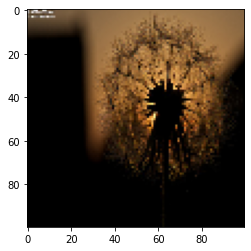

In [5]:
import matplotlib.pyplot as plt
plt.imshow(Train_data[1][0])

In [6]:
Train_x = []
Train_y = []
for feature,label in Train_data:
    Train_x.append(feature)
    Train_y.append(label)

In [7]:
xx = np.array(Train_x)
yy = np.array(Train_y, dtype="float32")

In [8]:
xx[0]

array([[[1.2313726e-01, 1.4639215e-01, 2.7843136e-02],
        [8.3176464e-02, 1.6635293e-01, 4.4784311e-02],
        [8.4509797e-02, 1.5901960e-01, 5.9607841e-02],
        ...,
        [3.4509804e-02, 6.6666670e-02, 1.7058823e-02],
        [1.5113842e-01, 1.8098138e-01, 1.5372818e-02],
        [2.4407844e-01, 2.7203912e-01, 1.5490185e-02]],

       [[1.2811764e-01, 1.4768627e-01, 5.0549012e-02],
        [5.3725492e-02, 1.2090196e-01, 1.9607846e-02],
        [2.8627450e-02, 9.8039217e-02, 1.2941175e-02],
        ...,
        [1.1764706e-02, 7.1764708e-02, 2.3529418e-03],
        [3.0517733e-01, 2.5039288e-01, 2.9294070e-02],
        [2.0596096e-01, 2.6043141e-01, 1.7568536e-02]],

       [[8.8039219e-02, 9.5686272e-02, 1.9607847e-04],
        [2.4901964e-02, 8.0000006e-02, 9.6078441e-03],
        [1.6666668e-02, 5.9803922e-02, 1.9607844e-03],
        ...,
        [1.0784314e-01, 1.7549020e-01, 5.5882353e-02],
        [1.1019670e-01, 1.9235325e-01, 1.5294214e-02],
        [2.9156870e-01

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.5, random_state=42)

In [11]:
X_train.shape, y_train.shape, x_test.shape,y_test.shape

((2161, 100, 100, 3), (2161,), (2162, 100, 100, 3), (2162,))

In [12]:
type(X_train),type(y_train), type(x_test),type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [98]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [99]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [100]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
68/68 [==============================] - 14s 213ms/step - loss: 1.4987 - accuracy: 0.3031 - val_loss: 1.2827 - val_accuracy: 0.4103
Epoch 2/20
68/68 [==============================] - 14s 210ms/step - loss: 1.2767 - accuracy: 0.4294 - val_loss: 1.2609 - val_accuracy: 0.4154
Epoch 3/20
68/68 [==============================] - 15s 214ms/step - loss: 1.1778 - accuracy: 0.4863 - val_loss: 1.1101 - val_accuracy: 0.5694
Epoch 4/20
68/68 [==============================] - 16s 236ms/step - loss: 1.1110 - accuracy: 0.5298 - val_loss: 1.1896 - val_accuracy: 0.4963
Epoch 5/20
68/68 [==============================] - 16s 230ms/step - loss: 1.0524 - accuracy: 0.5669 - val_loss: 1.0623 - val_accuracy: 0.5657
Epoch 6/20
68/68 [==============================] - 16s 236ms/step - loss: 0.9733 - accuracy: 0.6108 - val_loss: 0.9800 - val_accuracy: 0.5990
Epoch 7/20
68/68 [==============================] - 16s 231ms/step - loss: 0.8948 - accuracy: 0.6298 - val_loss: 0.9936 - val_accuracy: 0.6184

In [101]:
model.evaluate(X_train,  y_train, verbose=2)

68/68 - 2s - loss: 0.1826 - accuracy: 0.9320


[0.18259814381599426, 0.9319759607315063]

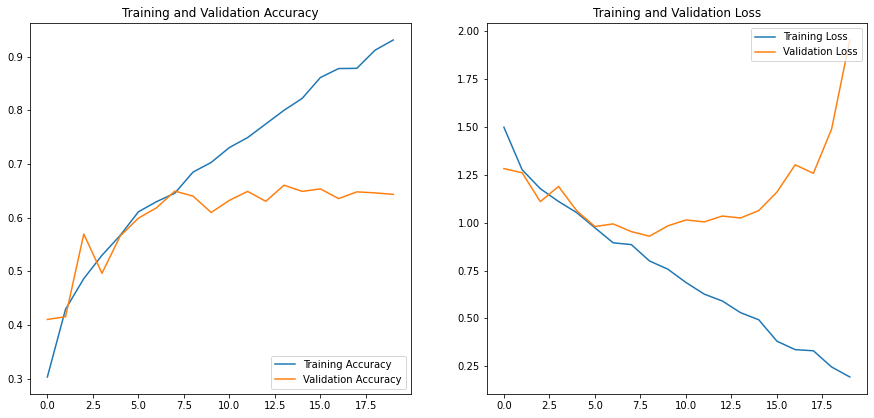

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [121]:
img_lod = load_img(r'C:\Users\Abhay Rohilla\Desktop\dandelionjpg2.jpg')
Resized = img_to_array(img_lod)
image = tf.image.resize(Resized, (100, 100))
ri = image/255
img_batch = np.expand_dims(ri, axis=0)
prediction = model.predict(img_batch)

In [122]:
np.round(prediction[0][1:])

array([0., 1., 0., 0., 0.], dtype=float32)

In [133]:
prediction

array([[8.0782216e-09, 3.0718648e-04, 9.9564749e-01, 3.9779148e-03,
        3.8195263e-05, 2.9166340e-05]], dtype=float32)

In [137]:
(9.9564749e-01/sum(prediction[0]))*100

99.56475288401673

In [139]:
sum(prediction[0])

0.999999960990043

In [90]:
# if i.startswith('daisy'):
#                     Data_label = 1
#                 if i.startswith('dandelion'):
#                     Data_label = 2
#                 if i.startswith('rose'):
#                     Data_label = 3
#                 if i.startswith('sunflower'):
#                     Data_label = 4
#                 if i.startswith('tulip'):
#                     Data_label = 5

In [148]:
quotient =  2.9166340e-05 / 0.999999960990043

percentage = quotient * 100
np.round(percentage)

0.0